# Исследование объявлений о продаже квартир



## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
pd.set_option('display.max_columns', 50)

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


### Вывод

Общее количество строк 23699. В таблице есть 22 столбца.

Столбцы с пропусками:

ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
is_apartment            2775 non-null object
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000        18181 non-null float64
ponds_nearest           9110 non-null float64
days_exposition         20518 non-null float64

По следующим столбцам необходимо менять тип данных:

floors_total            23613 non-null float64 (int)
is_apartment            2775 non-null object (boolean)
first_day_exposition    23699 non-null object (date)
balcony                 12180 non-null float64 (int)
ponds_around3000        18181 non-null float64 (int)
days_exposition         20518 non-null float64 (int)


## Предобработка данных

Для начала разберемся с пропусками в данных

In [7]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [8]:
data['days_exposition'].isna().sum()

0

In [9]:
data['days_exposition'].describe

<bound method NDFrame.describe of 0          0
1         81
2        558
3        424
4        121
        ... 
23694      0
23695     45
23696      0
23697    602
23698      0
Name: days_exposition, Length: 23699, dtype: int64>

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [11]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [12]:
data['balcony'].isna().sum()

0

In [13]:
data['balcony'].describe

<bound method NDFrame.describe of 0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int64>

In [14]:
data['last_price'] = data['last_price'].astype('int')

In [15]:
data['last_price'].describe

<bound method NDFrame.describe of 0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64>

В категориальных переменных заменим пропуски на средние значения

In [16]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].mean())

In [17]:
data['ponds_around3000'].isna().sum()

0

In [18]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [19]:
data['ponds_around3000'].describe

<bound method NDFrame.describe of 0        2
1        0
2        2
3        3
4        1
        ..
23694    3
23695    0
23696    0
23697    3
23698    0
Name: ponds_around3000, Length: 23699, dtype: int64>

In [20]:
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].mean())

In [21]:
data['parks_nearest'].isna().sum()

0

In [22]:
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].mean())

In [23]:
data['parks_around3000'].isna().sum()

0

In [24]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [25]:
data['parks_around3000'].describe

<bound method NDFrame.describe of 0        1
1        0
2        1
3        2
4        2
        ..
23694    1
23695    0
23696    0
23697    2
23698    0
Name: parks_around3000, Length: 23699, dtype: int64>

In [26]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

In [27]:
data['kitchen_area'].isna().sum()

0

In [154]:
#data['floors_total'] = data['floors_total'].fillna(data['floors_total'].mean())

In [28]:
data.dropna(subset = ['floors_total'], inplace=True)

In [29]:
data.query('floor > floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [30]:
data['floors_total'].isna().sum()

0

In [31]:
data['floors_total'] = data['floors_total'].astype('int')

In [32]:
data['floors_total'].describe

<bound method NDFrame.describe of 0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23613, dtype: int64>

In [33]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [34]:
data['is_apartment'] = data['is_apartment'].fillna(0) # Либо на FALSE ?????

In [35]:
data['is_apartment'].isna().sum()

0

In [36]:
data.dropna(subset=['locality_name'], inplace = True)

In [37]:
data['locality_name'].isna().sum()

0

In [38]:
data['ceiling_height'] = data['ceiling_height'].astype('float64')

In [39]:
mediana_h = data['ceiling_height'].median()

In [40]:
data['ceiling_height'].fillna(mediana_h, inplace = True)

In [41]:
data['ceiling_height'].isna().sum()

0

In [42]:
group_airports = data.groupby('locality_name')['airports_nearest'].transform('median')

In [43]:
data['airports_nearest'].fillna(group_airports, inplace = True)

In [44]:
data['airports_nearest'].isna().sum()

5432

In [45]:
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].mean())

In [46]:
data['airports_nearest'].isna().sum()

0

In [47]:
data['m2'] = round(data['last_price'] / data['total_area']) 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.0,0,120370.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.804555,0,NaN,81,82921.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.0,558,92786.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,True,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.0,424,408176.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.0,121,100000.0


In [48]:
group_m2 = data.groupby('locality_name')['m2'].transform('mean')

In [49]:
group_m2.isna().sum()

0

In [50]:
data['m2'].fillna(group_m2, inplace = True)

In [51]:
group_m2.isna().sum()

0

In [52]:
data.dropna(subset = ['m2'], inplace = True)

In [53]:
data['m2'].isna().sum()

0

In [54]:
#data['living_area'].fillna(data['last_price'] / data['m2'], inplace = True)
#data['living_area'].fillna(data['living_area'] / data['total_area'], inplace = True)

In [55]:
k = data['living_area'] / data['total_area']

In [56]:
k

0        0.472222
1        0.460396
2        0.612500
3             NaN
4        0.320000
           ...   
23694    0.547792
23695    0.644068
23696    0.523810
23697         NaN
23698    0.380805
Length: 23565, dtype: float64

In [57]:
_k = (data['living_area'].median() / data['total_area'].median()).round(2)
_k

0.58

In [58]:
data['living_area'].isnull().sum()

1865

In [59]:
data['living_area'].fillna(data['total_area']*_k, inplace = True)

In [60]:
data['living_area'].isnull().sum()

0

In [61]:
data['kitchen_area'].isnull().sum()

0

In [62]:
data[['rooms', 'kitchen_area']]

,rooms,kitchen_area
0,3,25.00
1,1,11.00
2,2,8.30
3,3,9.10
4,2,41.00
...,...,...
23694,3,13.83
23695,3,8.50
23696,2,9.10
23697,2,23.30


In [63]:
data.groupby('rooms')['kitchen_area'].agg('median')

rooms
0       9.10
1       9.10
2       9.00
3       9.10
4      10.50
5      14.40
6      18.85
7      18.00
8      23.10
9      13.75
10     19.80
11     12.60
12    112.00
14     21.25
15    100.00
16     13.00
19     27.60
Name: kitchen_area, dtype: float64

In [64]:
data['kitchen_area'] = (data.groupby('rooms')['kitchen_area'].apply(lambda x: x.fillna(x.median())))
data[['rooms', 'kitchen_area']]                        

,rooms,kitchen_area
0,3,25.00
1,1,11.00
2,2,8.30
3,3,9.10
4,2,41.00
...,...,...
23694,3,13.83
23695,3,8.50
23696,2,9.10
23697,2,23.30


In [65]:
data['living_area'].fillna(data['total_area']*k, inplace = True)

In [66]:
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area']*k

In [67]:
data['living_area']

0        51.000
1        18.600
2        34.300
3        92.220
4        32.000
          ...  
23694    73.300
23695    38.000
23696    29.700
23697    44.515
23698    12.300
Name: living_area, Length: 23565, dtype: float64

In [68]:
data['living_area'] = data['living_area'].astype('float64')

In [69]:
data['living_area'].isna().value_counts()

False    23565
Name: living_area, dtype: int64

In [70]:
data['k'] = data['living_area'] / data['total_area']

In [71]:
data['k'] = data['k'].astype('float64')

In [72]:
data['living_area'].fillna(data['total_area']*data['k'], inplace = True)

In [73]:
data['living_area'].isna().value_counts()

False    23565
Name: living_area, dtype: int64

In [74]:
data['living_area'].isna().sum()

0

In [75]:
data['living_area'].isna().sum()

0

In [194]:
#data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].mean())

In [195]:
#data['ponds_nearest'].isna().sum()

In [76]:
data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('mean'), inplace = True)

In [77]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].mean())

In [78]:
data['cityCenters_nearest'].isna().sum()

0

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        23565 non-null float64
cityCenters_nearest     23565 non-null float64
parks_around3000        23565 non-null int64
parks_nearest           23565 non-null float64
ponds_around300

Заполнены пропущенные значения, создан 1 новый столбец, тип данных в столбцах приведен к корректному.

## Рассчёты и добавление результатов в таблицу

день недели, месяц и год публикации объявления. создание соответствующих столбцов.

In [80]:
data['weekday_exp'] = data['first_day_exposition'].dt.weekday

In [81]:
data['month_exp'] = data['first_day_exposition'].dt.month

In [82]:
data['year_exp'] = data['first_day_exposition'].dt.year

In [83]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2,k,weekday_exp,month_exp,year_exp
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.0,0,120370.0,0.472222,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.804555,0,NaN,81,82921.0,0.460396,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.0,558,92786.0,0.612500,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,92.22,9,True,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.0,424,408176.0,0.580000,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.0,121,100000.0,0.320000,1,6,2018


этаж квартиры; варианты — первый, последний, другой

In [84]:
def floors_group(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [85]:
data['floors_group']  = data.apply(floors_group, axis = 1)

In [86]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2,k,weekday_exp,month_exp,year_exp,floors_group
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.0,0,120370.0,0.472222,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.804555,0,NaN,81,82921.0,0.460396,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.0,558,92786.0,0.612500,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,92.22,9,True,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.0,424,408176.0,0.580000,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.0,121,100000.0,0.320000,1,6,2018,другой


соотношение жилой и общей площади

In [87]:
data['living-total'] = round(data['living_area'] / data['total_area'])
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2,k,weekday_exp,month_exp,year_exp,floors_group,living-total
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.0,0,120370.0,0.472222,3,3,2019,другой,0.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.804555,0,NaN,81,82921.0,0.460396,1,12,2018,первый,0.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.0,558,92786.0,0.612500,3,8,2015,другой,1.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,92.22,9,True,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.0,424,408176.0,0.580000,4,7,2015,другой,1.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.0,121,100000.0,0.320000,1,6,2018,другой,0.0


отношение площади кухни к общей

In [88]:
data['kitchen-total'] = round(data['kitchen_area'] / data['total_area'])
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2,k,weekday_exp,month_exp,year_exp,floors_group,living-total,kitchen-total
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.0,0,120370.0,0.472222,3,3,2019,другой,0.0,0.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.804555,0,NaN,81,82921.0,0.460396,1,12,2018,первый,0.0,0.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.0,558,92786.0,0.612500,3,8,2015,другой,1.0,0.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,92.22,9,True,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.0,424,408176.0,0.580000,4,7,2015,другой,1.0,0.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.0,121,100000.0,0.320000,1,6,2018,другой,0.0,0.0


## Исследовательский анализ данных

Исследуем площадь

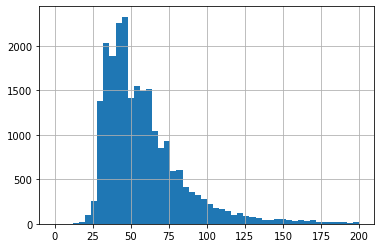

In [89]:
data['total_area'].hist(bins = 50, range = (0, 200))

47-49 кв. м. - максимальное количество проданных квартир в этом диапазоне

Функция для определения границы усов

In [90]:
def yc(column):
    statistics = data[column].describe()
    razmax = statistics[6] - statistics[4]
    left_yc = statistics[4] - 1.5 * razmax
    right_yc = statistics[6] + 1.5 * razmax
    if left_yc < statistics[3]:
        left_yc = statistics[3]
    if right_yc > statistics[7]:
        right_yc = statistics[7]
        
    return [left_yc, right_yc]

Диаграмма размаха :

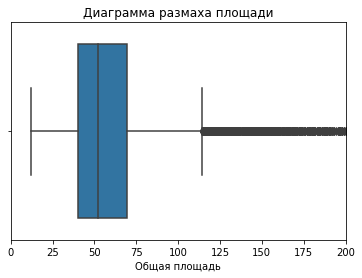

In [91]:
sns.boxplot(data['total_area'])
plt.title('Диаграмма размаха площади')
plt.xlabel('Общая площадь')
plt.xlim(0, 200)
plt.show()

Функция для определения выбивающихся значений

In [92]:
def deviations (column):
    return 'Отклонения = {:.1%}'.format(len(data.loc[data[column] > yc(column)[1]]) / len(data)) + ' по заданной выборке'

In [93]:
deviations('total_area')

'Отклонения = 5.3% по заданной выборке'

In [94]:
# выбросы по площади выделим в отдельный столбец
data['dev_total_area'] = data['total_area'] > yc('total_area')[1]

Цена

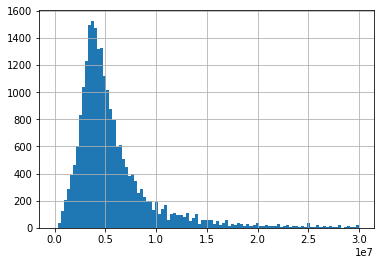

In [95]:
data['last_price'].hist(bins = 100, range = (0, 30000000))

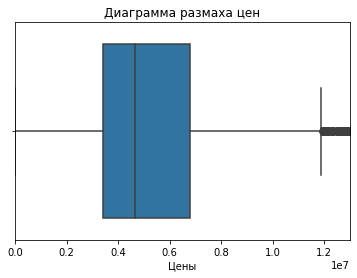

In [96]:
sns.boxplot(data['last_price'])
plt.title('Диаграмма размаха цен')
plt.xlabel('Цены')
plt.xlim(0, 13000000)
plt.show()

In [97]:
deviations('last_price')

'Отклонения = 8.7% по заданной выборке'

3.5 млн р - средний ценник с максимальным количеством проданных квартир

In [98]:
# выбросы по цене выделим в отдельный столбец
data['dev_price'] = data['last_price'] > yc('last_price')[1]

Высота потолков

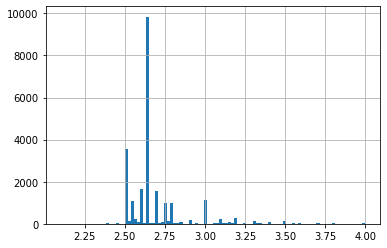

In [99]:
data['ceiling_height'].hist(bins = 100, range = (2.1, 4))

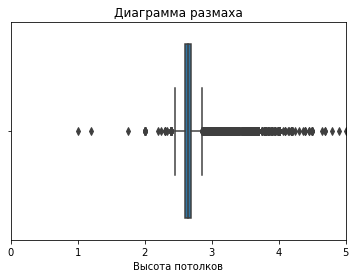

In [100]:
sns.boxplot(data['ceiling_height'])
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолков')
plt.xlim(0, 5)
plt.show()

In [101]:
deviations('ceiling_height')

'Отклонения = 12.3% по заданной выборке'

2.6 м - высота потолка с максимальным количеством проданных квартир

In [102]:
# выбросы по потолкам выделим в отдельный столбец
data['dev_ceiling'] = (data['ceiling_height'] > yc('ceiling_height')[1]) | (data['ceiling_height'] < yc('ceiling_height')[0])

In [103]:
data.dropna(subset=['dev_ceiling'], inplace=True)

Число комнат

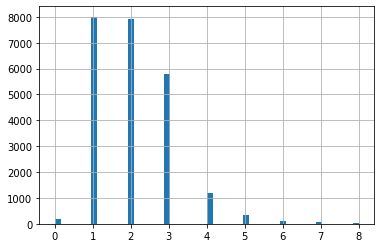

In [104]:
data['rooms'].hist(bins = 50, range = (0, 8))

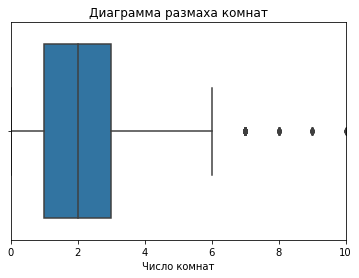

In [105]:
sns.boxplot(data['rooms'])
plt.title('Диаграмма размаха комнат')
plt.xlabel('Число комнат')
plt.xlim(0, 10)
plt.show()

In [106]:
deviations('rooms')

'Отклонения = 0.4% по заданной выборке'

чаще всего продаются однушки и двухкомнатные квартиры 

In [107]:
# выбросы по комнатам выделим в отдельный столбец
data['dev_rooms'] = data['rooms'] > yc('rooms')[1]

In [108]:
# исследуем количество дней размещения объявления
data['days_exposition'].describe()

count    23565.000000
mean       156.420115
std        213.517293
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

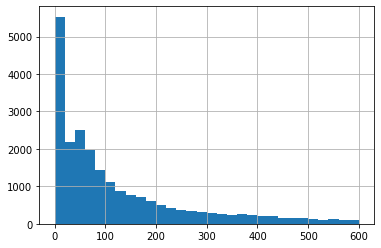

In [109]:
data['days_exposition'].hist(bins = 30, range = (0, 600))

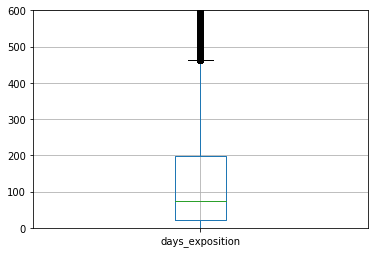

In [110]:
plt.ylim(0, 600)
data.boxplot(column = 'days_exposition')
plt.show()

По гистограмме - довольно много значений за пределами 450 дней (недвижимость не очень ликвидный инструмент), тем не менее, среднее время продажи квартиры это 90 дней. 

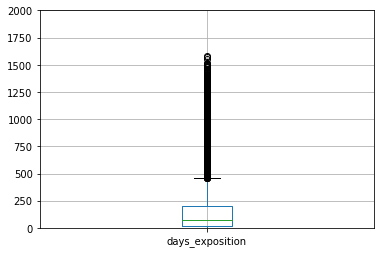

In [111]:
plt.ylim(0, 2000)
data.boxplot(column = 'days_exposition')
plt.show()

In [112]:
data['days_exposition'].describe()

count    23565.000000
mean       156.420115
std        213.517293
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [113]:
# выбросы по дням выделим в отдельные столбецы
data['dev_slow'] = data['days_exposition'] > yc('days_exposition')[1]
data['dev_fast'] = data['days_exposition'] < 30

In [114]:
data.sort_values(by = 'days_exposition', ascending = False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2,k,weekday_exp,month_exp,year_exp,floors_group,living-total,kitchen-total,dev_total_area,dev_price,dev_ceiling,dev_rooms,dev_slow,dev_fast
18843,11,3500000,48.2,2014-12-15,2,2.50,5,27.4,2,True,False,False,7.7,3,деревня Новое Девяткино,28788.533971,14193.186076,0,490.804555,0,NaN,1580,72614.0,0.568465,0,12,2014,другой,1.0,0.0,False,False,False,False,True,False
1109,1,34878556,95.8,2014-12-09,2,2.65,6,58.3,5,True,False,False,20.0,1,Санкт-Петербург,21860.000000,318.000000,2,160.000000,3,569.0,1572,364077.0,0.608559,1,12,2014,другой,1.0,0.0,False,True,False,False,True,False
9553,11,10600000,80.0,2014-12-09,3,2.85,17,44.0,9,True,False,False,15.0,0,Санкт-Петербург,17101.000000,17110.000000,0,490.804555,0,NaN,1553,132500.0,0.550000,1,12,2014,другой,1.0,0.0,False,False,False,False,True,False
1885,2,13300000,79.6,2014-12-09,2,3.00,8,42.7,7,True,False,False,18.0,0,Санкт-Петербург,39393.000000,11096.000000,1,537.000000,0,NaN,1513,167085.0,0.536432,1,12,2014,другой,1.0,0.0,False,True,True,False,True,False
20969,18,13300000,133.0,2015-02-11,4,3.00,5,58.0,2,True,False,False,45.0,0,Санкт-Петербург,24653.000000,5032.000000,0,490.804555,1,534.0,1512,100000.0,0.436090,2,2,2015,другой,0.0,0.0,True,True,True,False,True,False


In [115]:
# Оставим в таблице корректные значения , без выбросов по days_exposition
new_df = data.query('days_exposition < 450')

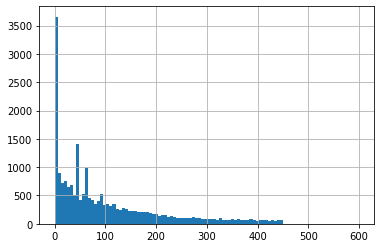

In [116]:
new_df['days_exposition'].hist(bins = 100, range = (0, 600))

In [117]:
cleaned_data = data[(data['dev_total_area'] == False) & (data['dev_price'] == False) & (data['dev_ceiling'] == False) &
     (data['dev_rooms'] == False) & (data['dev_slow'] == False) & (data['dev_fast'] == False)].reset_index(drop=True)

In [118]:
yc('ceiling_height')

[2.45, 2.8500000000000005]

In [119]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [120]:
data['ceiling_height'].max()

100.0

In [121]:
cleaned_data['ceiling_height'].max()

2.85

In [122]:
cleaned_data['ceiling_height'].describe()

count    12574.000000
mean         2.629780
std          0.078901
min          2.450000
25%          2.600000
50%          2.650000
75%          2.650000
max          2.850000
Name: ceiling_height, dtype: float64

In [123]:
deviations('ceiling_height')

'Отклонения = 12.3% по заданной выборке'

In [124]:
data.dropna(subset=['dev_ceiling'], inplace=True)

In [125]:
def deviations1 (column):
    return 'Отклонения = {:.1%}'.format(len(cleaned_data.loc[cleaned_data[column] > yc(column)[1]]) / len(cleaned_data)) + ' по заданной выборке'

In [126]:
deviations1('ceiling_height')

'Отклонения = 0.0% по заданной выборке'

(0, 40000000.0)

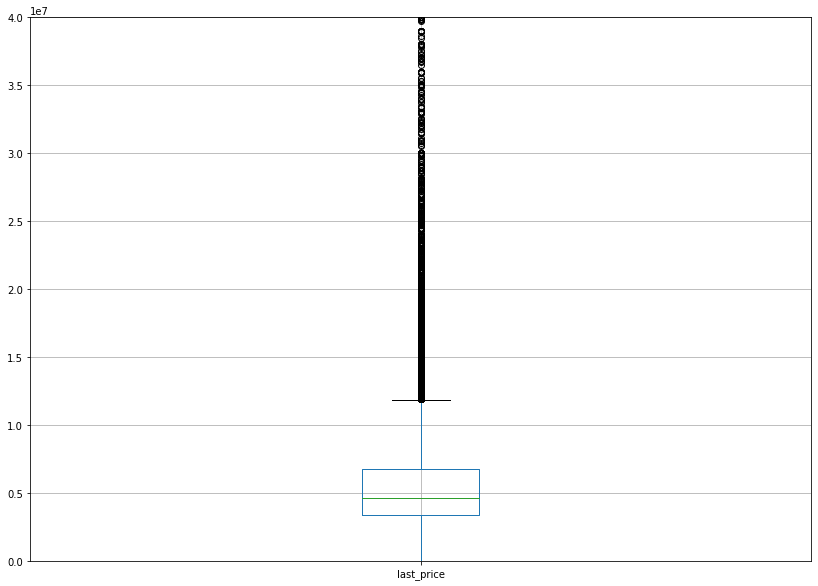

In [127]:
data.boxplot(column='last_price', figsize=(14,10))
plt.ylim(0,40e6)

(0, 25000000.0)

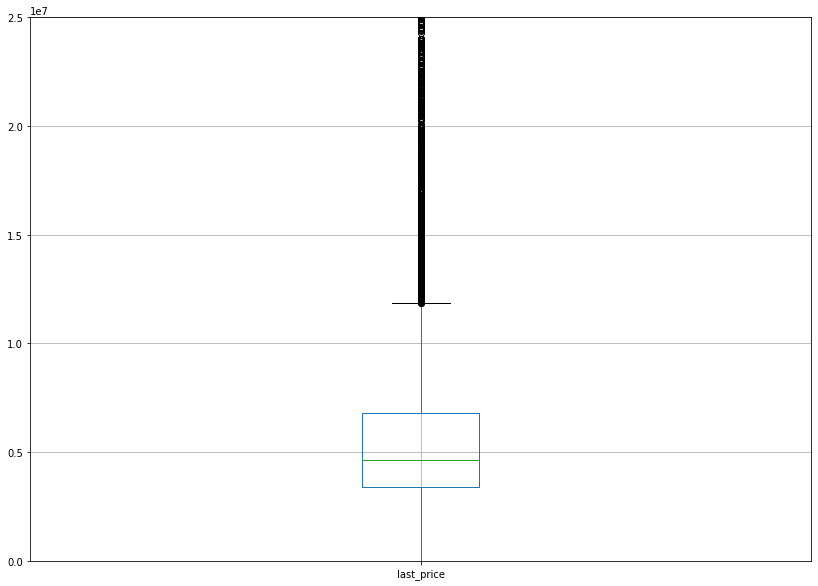

In [128]:
data.boxplot(column='last_price', figsize=(14,10))
plt.ylim(0,25e6)

(0, 30)

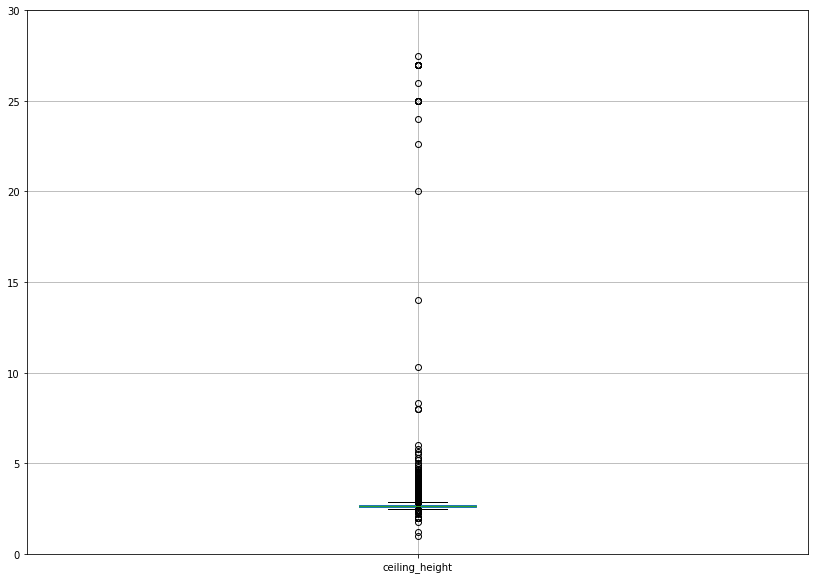

In [158]:
data.boxplot(column='ceiling_height', figsize=(14,10))
plt.ylim(0,30)

(0, 30)

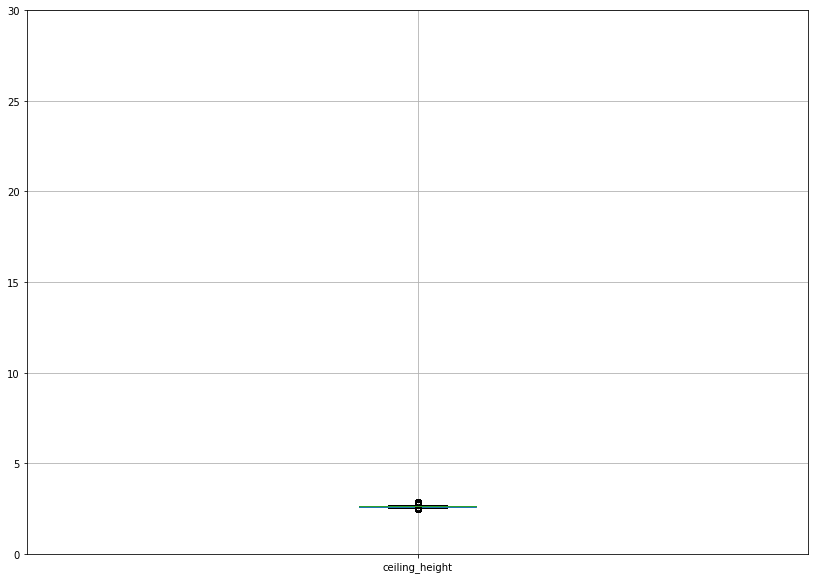

In [159]:
cleaned_data.boxplot(column='ceiling_height', figsize=(14,10))
plt.ylim(0,30)

In [168]:
#data['dev_ceiling'] = (data['ceiling_height'] > yc('ceiling_height')[1]) | (data['ceiling_height'] < yc('ceiling_height')[0])
#data.dropna(subset=['dev_ceiling'], inplace=True)

In [171]:
data['ceiling_height'].describe

<bound method NDFrame.describe of 0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23565, dtype: float64>

In [ ]:
#cleaned_data = data[(data['dev_total_area'] == False) & (data['dev_price'] == False) & (data['dev_ceiling'] == False) &
#     (data['dev_rooms'] == False) & (data['dev_slow'] == False) & (data['dev_fast'] == False)].reset_index(drop=True)

In [174]:
cleaned_data['ceiling_height'].describe

<bound method NDFrame.describe of 0        2.65
1        2.65
2        2.65
3        2.65
4        2.50
         ... 
12569    2.55
12570    2.65
12571    2.65
12572    2.60
12573    2.65
Name: ceiling_height, Length: 12574, dtype: float64>

In [179]:
data[data['ceiling_height'] > 4].dropna(subset=['ceiling_height'], inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
print(cleaned_data.ceiling_height.max())
print(cleaned_data.total_area.min()) # площадь от 12 квадратов. Не знаю, норма это или нет, но я отбрасываю. 

2.85
12.0


Для наглядности отражены все выбросы 

In [130]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

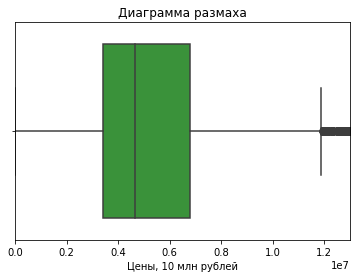

In [131]:
sns.boxplot(data['last_price'], color='tab:green')
plt.title('Диаграмма размаха')
plt.xlabel('Цены, 10 млн рублей')
x1 = plt.xlim(0, 13000000)

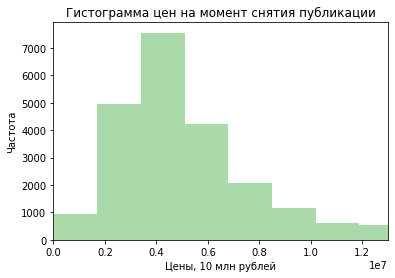

In [132]:
sns.distplot(data['last_price'], kde=False, bins=450, color='tab:green')
plt.xlim(0, 13000000)
plt.title('Гистограмма цен на момент снятия публикации')
plt.xlabel('Цены, 10 млн рублей')
y1 = plt.ylabel('Частота')

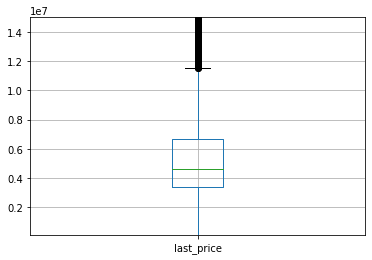

In [133]:
plt.ylim(100000,15000000)
new_df.boxplot(column = 'last_price')
plt.show()

Судя по гистограммам, в выбросы попадают квартиры, стоимостью > 11 млн р

Уберем выбивающиея значения

Факторы, влияющие на стоимость квартиры

Рассмотрим зависимость цены от площади квартиры и удаленности от центра

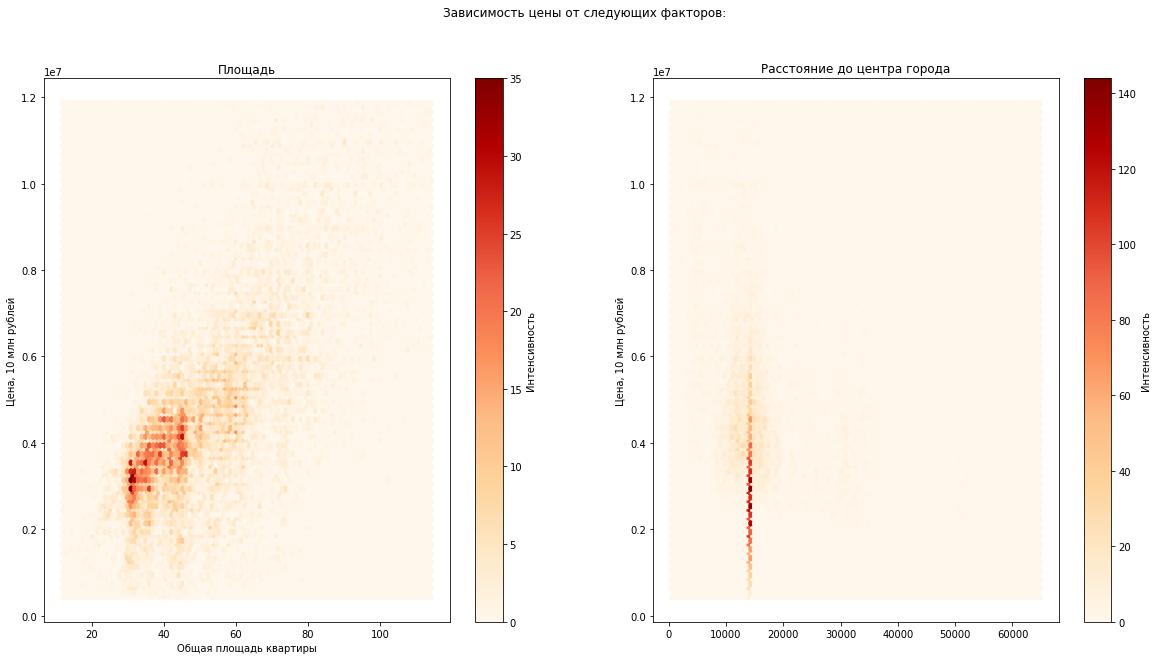

In [134]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (20, 10))
fig.suptitle('Зависимость цены от следующих факторов:')

ax1.set_title('Площадь')
ax1.set_ylabel('Цена, 10 млн рублей')
ax1.set_xlabel('Общая площадь квартиры')

_1 = ax1.hexbin(cleaned_data['total_area'], cleaned_data['last_price'], cmap='OrRd')
__1 = fig.colorbar(_1, ax=ax1)
__1.set_label('Интенсивность')

ax2.set_title('Расстояние до центра города')
ax2.set_ylabel('Цена, 10 млн рублей')

_2 = ax2.hexbin(cleaned_data['cityCenters_nearest'], cleaned_data['last_price'], cmap='OrRd')
__2 = fig.colorbar(_2, ax=ax2)
__2.set_label('Интенсивность')
plt.show()

Судя по графикам наблюдаем довольно высокую корреляцию цены по отношению к площади,что вполне логично, а также небольшую отрицательную корреляцию цены по отношению к расстоянию до центра города - чем дальше квартира от центра города, тем она будет стоить дешевле при прочих равных условиях.

In [135]:
cleaned_data['last_price'].corr(cleaned_data['total_area'])

0.6864079252838561

In [136]:
cleaned_data['last_price'].corr(cleaned_data['cityCenters_nearest'])

-0.20211135966057245

Рассмотрим зависимость цены от числа комнат, этажа квартиры и даты размещения объявления

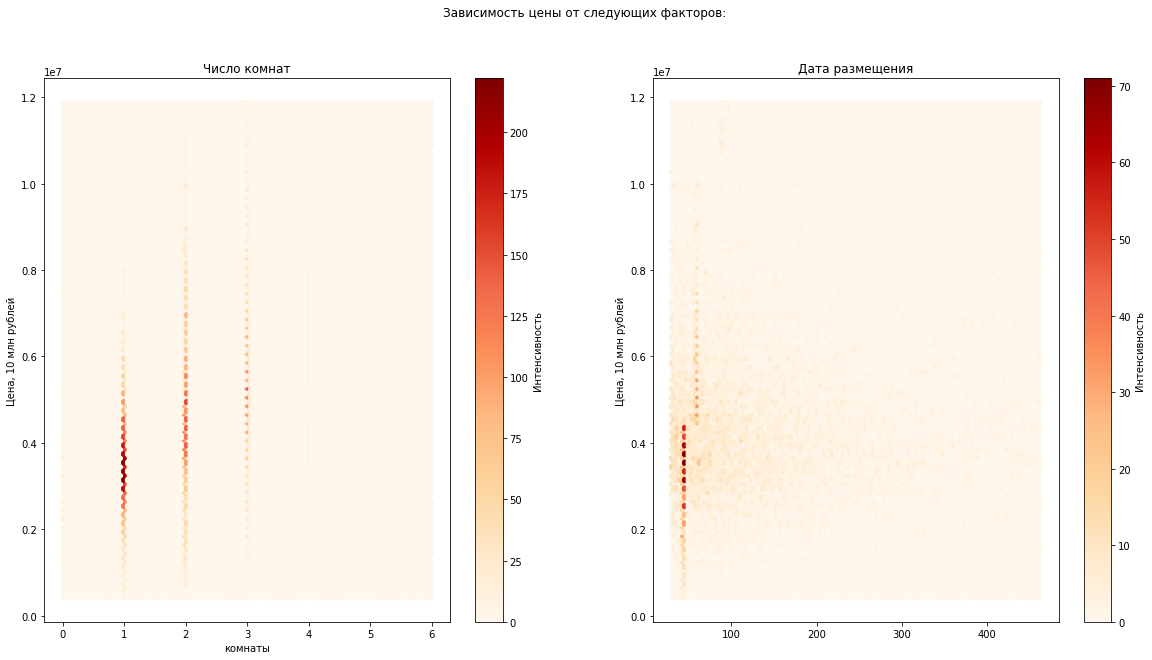

In [137]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (20, 10))
fig.suptitle('Зависимость цены от следующих факторов:')

ax1.set_title('Число комнат')
ax1.set_ylabel('Цена, 10 млн рублей')
ax1.set_xlabel('комнаты')

_1 = ax1.hexbin(cleaned_data['rooms'], cleaned_data['last_price'], cmap='OrRd')
__1 = fig.colorbar(_1, ax=ax1)
__1.set_label('Интенсивность')

ax2.set_title('Дата размещения')
ax2.set_ylabel('Цена, 10 млн рублей')

_2 = ax2.hexbin(cleaned_data['days_exposition'], cleaned_data['last_price'], cmap='OrRd')
__2 = fig.colorbar(_2, ax=ax2)
__2.set_label('Интенсивность')
plt.show()

Судя по графикам наблюдаем довольно высокую корреляцию цены по отношению к числу комнат (что косвенно связано с площадью), а также небольшую положительную корреляцию цены по отношению к этажу - на первом этаже квартира будет стоить дешевле при прочих равных условиях.

In [138]:
cleaned_data['last_price'].corr(cleaned_data['rooms'])

0.4125296463385638

In [139]:
cleaned_data['last_price'].corr(cleaned_data['floor'])

0.1936853091203

In [140]:
cleaned_data['last_price'].corr(cleaned_data['days_exposition'])

0.02707940446667288

In [141]:
data.loc[data['floor'] == 1, 'floor_group'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_group'] = 'последний'
data.loc[data['floor_group'].isna(), 'floor_group'] = 'другой'

10 населённых пунктов с наибольшим числом объявлений

In [142]:
mediana_price = cleaned_data.pivot_table(index = 'locality_name', values = 'm2', aggfunc = ['count', 'median'])
mediana_price.columns = ['count', 'median']
mediana_price.sort_values('count', ascending = False).head(10)

,count,median
locality_name,,
Санкт-Петербург,7674,100337.0
посёлок Мурино,359,86232.0
посёлок Шушары,310,75649.5
Всеволожск,253,65833.0
посёлок Парголово,229,90837.0
деревня Кудрово,212,92225.0
Колпино,207,73379.0
Гатчина,187,66667.0
Пушкин,187,97297.0


Выделите квартиры в Санкт-Петербурге ('locality_name').

In [143]:
cleaned_data['cс_km'] = round(cleaned_data['cityCenters_nearest'] / 1000, 0)

In [144]:
cleaned_data['cс_km'] = cleaned_data['cс_km'].astype('int', errors = 'ignore')

In [145]:
cleaned_data.loc[(cleaned_data['locality_name'] == 'Санкт-Петербург') & (cleaned_data['cс_km'].notna()), 'cс_km'].apply(round)
spb = cleaned_data.query('locality_name == "Санкт-Петербург"')
spb_center = spb.pivot_table(index = 'cс_km', values = ['m2', 'last_price'], aggfunc = 'median')
spb_center.head()

,last_price,m2
cс_km,,
0,6100000,126560.5
1,7700000,106173.0
2,8200000,112308.0
3,6250000,106394.5
4,6900000,112333.0


/opt/conda/lib/python3.7/site-packages/pandas/core/indexes/base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


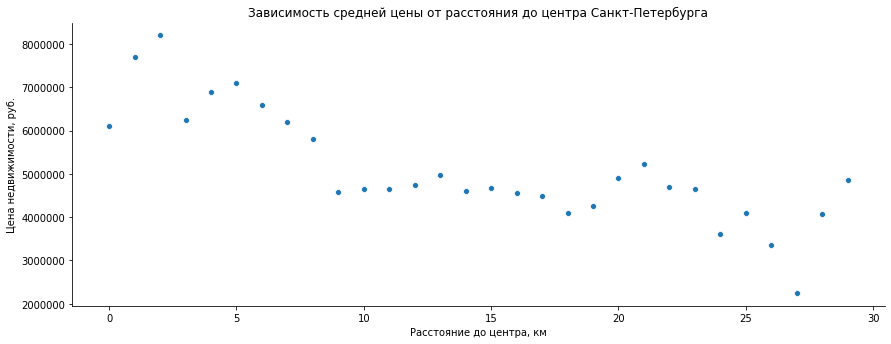

In [146]:
sns.relplot(x = spb_center.index, y = 'last_price', data = spb_center, height = 5, aspect = 2.5)
plt.title('Зависимость средней цены от расстояния до центра Санкт-Петербурга')
plt.ylabel('Цена недвижимости, руб.')
plt.xlabel('Расстояние до центра, км')
plt.show()

Центральная зона около скачка с 9 до 8 км от центра

In [147]:
spb_center = cleaned_data[(cleaned_data['cс_km'] <= 5) & (cleaned_data['locality_name'] == 'Санкт-Петербург')]

count    494.000000
mean      64.064939
std       20.761706
min       12.000000
25%       47.000000
50%       62.850000
75%       79.947500
max      114.200000
Name: total_area, dtype: float64


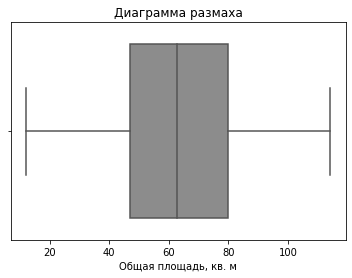

In [148]:
print(spb_center['total_area'].describe())
sns.boxplot(spb_center['total_area'], color = '.55')
plt.title('Диаграмма размаха')
plt.xlabel('Общая площадь, кв. м')
plt.show()

count    494.000000
mean     160.643725
std      115.859687
min       30.000000
25%       62.250000
50%      118.000000
75%      222.750000
max      462.000000
Name: days_exposition, dtype: float64


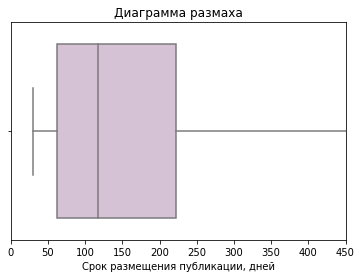

In [149]:
print(spb_center['days_exposition'].describe())
sns.boxplot(spb_center['days_exposition'], color = 'thistle')
plt.title('Диаграмма размаха')
plt.xlabel('Срок размещения публикации, дней')
plt.xlim(0, 450)
plt.show()

count    4.940000e+02
mean     7.246534e+06
std      2.090940e+06
min      2.400000e+06
25%      5.600000e+06
50%      7.100000e+06
75%      8.700000e+06
max      1.186686e+07
Name: last_price, dtype: float64


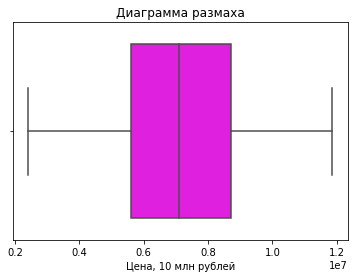

In [150]:
print(spb_center['last_price'].describe())
sns.boxplot(spb_center['last_price'], color = 'magenta')
plt.title('Диаграмма размаха')
plt.xlabel('Цена, 10 млн рублей')
plt.show()

count    494.000000
mean       2.667915
std        0.067294
min        2.460000
25%        2.650000
50%        2.650000
75%        2.650000
max        2.850000
Name: ceiling_height, dtype: float64


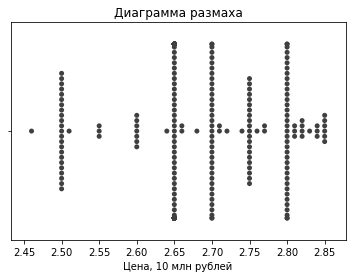

In [151]:
print(spb_center['ceiling_height'].describe())
sns.swarmplot(spb_center['ceiling_height'], color = '0.25')
plt.title('Диаграмма размаха')
plt.xlabel('Цена, 10 млн рублей')
plt.show()

count    494.000000
mean       2.230769
std        0.933588
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: rooms, dtype: float64


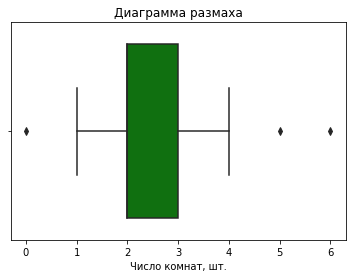

In [152]:
print(spb_center['rooms'].describe())
sns.boxplot(spb_center['rooms'], color = 'green')
plt.title('Диаграмма размаха')
plt.xlabel('Число комнат, шт.')
plt.show()

## Общий вывод

1. По параметрам: площадь, цена, высота потолков, число комнат

Выставленная на продажу в центре Санкт-Петербурга (в среднем): это 2-комнатная квартира площадью 60 кв. м с потолками 2,65 м, проданная за 150 дней по цене 6,9 млн рублей.

2. Факторы, которые влияют на стоимость квартиры

Из наблюдений - чем дальше от центра города, тем в среднем квартира будет стоить дешевле: 10 - 20 км от центра цены ровные, начиная с 8 км разница достигает 1.5 млн р.
Наблюдается сильная зависимость стоимости квартиры от числа комнат в центре, корреляция 0.41. 
Есть небольшая зависимость цены от этажа квартиры.
Больше всего квартир продается в будние дни

3. Ключевые параметры при определении рыночной стоимости объектов недвижимости:

общая площадь квартиры (выбросы свыше 114.2 кв. м)
число комнат (фактор становится важнее чем ближе приближаемся к центру)
этаж квартиры (фактор становится важнее чем ближе приближаемся к центру)
расстояние до центра города (центр города в радиусе 8 км)
срок продажи квартиры (если слишком быстро продаются то это до 1 месяца, слишком долго — свыше 14 месяцев).

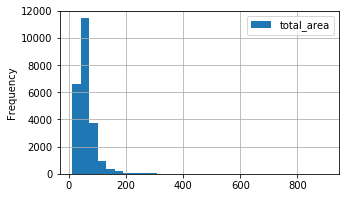

In [184]:
data.plot(y = 'total_area', kind = 'hist', bins = 30, grid=True, figsize = (5,3))

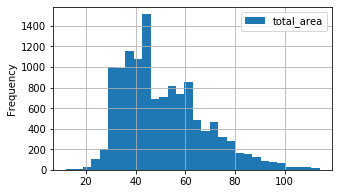

In [185]:
cleaned_data.plot(y = 'total_area', kind = 'hist', bins = 30, grid=True, figsize = (5,3))

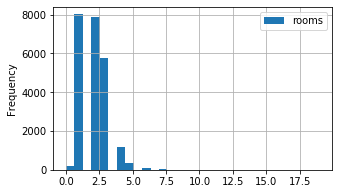

In [186]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))

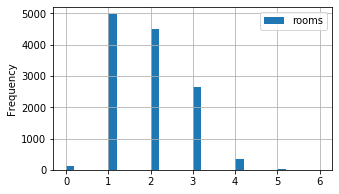

In [187]:
cleaned_data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))

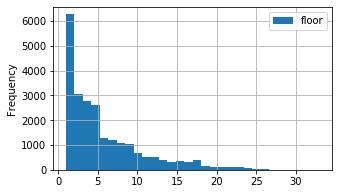

In [188]:
data.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, figsize = (5,3))

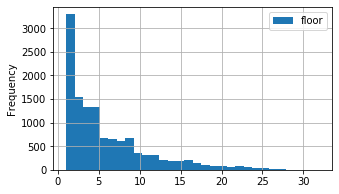

In [189]:
cleaned_data.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, figsize = (5,3))

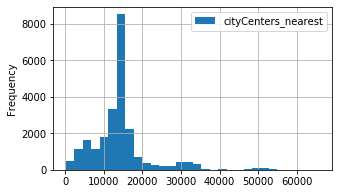

In [190]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, grid=True, figsize = (5,3))

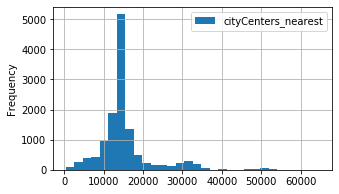

In [191]:
cleaned_data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, grid=True, figsize = (5,3))

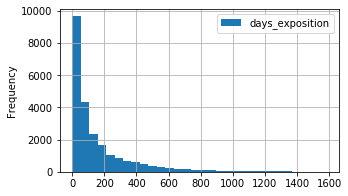

In [192]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid=True, figsize = (5,3))

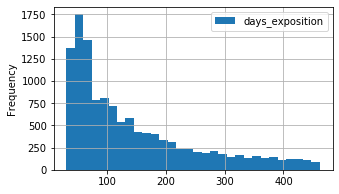

In [193]:
cleaned_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid=True, figsize = (5,3))